In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on Private Residential Transactions - Volume

## What does the dataset contain?

In [16]:
df = pd.read_csv('Data/1_alltransactions.csv', header=0, parse_dates=True)
df_postaldistrictsmap = pd.read_csv('Data/1_postaldistrictsmap.csv', header=0, index_col='Postal District')
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df['Postal District'] = df['Postal District'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67845 entries, 0 to 67844
Data columns (total 17 columns):
Unnamed: 0           67845 non-null int64
S/N                  67845 non-null int64
Project Name         67845 non-null object
Street Name          67845 non-null object
Type                 67845 non-null object
Postal District      67845 non-null int64
Market Segment       67845 non-null object
Tenure               67838 non-null object
Type of Sale         67845 non-null object
No. of Units         67845 non-null float64
Price ($)            67845 non-null float64
Nett Price ($)       67845 non-null object
Area (Sqft)          67845 non-null float64
Type of Area         67845 non-null object
Floor Level          67845 non-null object
Unit Price ($psf)    67845 non-null float64
Date of Sale         67845 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(9)
memory usage: 8.8+ MB


In [17]:
min_month, max_month = df['Date of Sale'].min().strftime('%Y-%b'), df['Date of Sale'].max().strftime('%Y-%b')
print(min_month, max_month)

2015-Apr 2018-Mar


## What is the Volume Trend during the Data Period?

### Trend by Total Volume

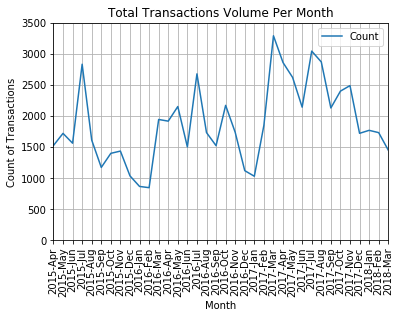

In [24]:
df_trans_per_mth = df.groupby(['Date of Sale']).size().reset_index(name='Count')
_ = df_trans_per_mth.plot(grid=True, title='Total Transactions Volume Per Month')
_ = plt.xlabel('Month')
_ = plt.xticks(df_trans_per_mth.index, df_trans_per_mth['Date of Sale'].dt.strftime('%Y-%b'), rotation=90)
_ = plt.ylabel('Count of Transactions')
_ = plt.yticks(np.arange(0,max(df_trans_per_mth['Count'])+500,500))

### Trend by Market Segment

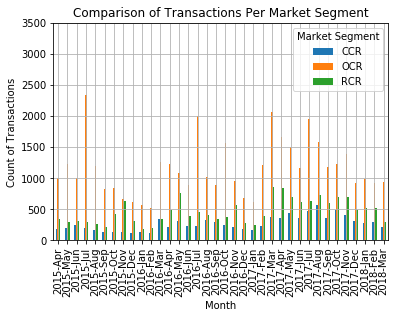

In [25]:
df_trans_per_mth_and_seg = df.groupby(['Date of Sale', 'Market Segment']).size().reset_index(name='Count')
df_trans_per_mth_and_seg_pivot = df_trans_per_mth_and_seg.pivot_table(index='Date of Sale', columns='Market Segment', values='Count')
_ = df_trans_per_mth_and_seg_pivot.plot(kind='bar', grid=True, title='Comparison of Transactions Per Market Segment')
_ = plt.xlabel('Month')
_ = plt.xticks(np.arange(len(df_trans_per_mth_and_seg_pivot.index)), df_trans_per_mth_and_seg_pivot.index.strftime('%Y-%b'), rotation=90)
_ = plt.ylabel('Count of Transactions')
_ = plt.yticks(np.arange(0,max(df_trans_per_mth['Count'])+500,500))

### Trend by Type of Sale

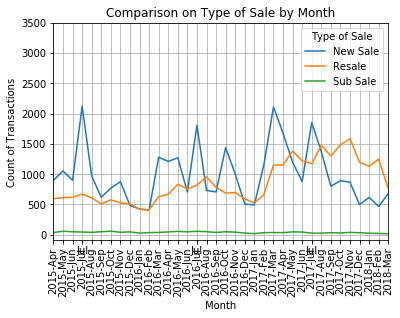

In [26]:
df_trans_per_mth_and_saletype = df.groupby(['Date of Sale', 'Type of Sale']).size().reset_index(name='Count')
df_trans_per_mth_and_saletype_pivot = df_trans_per_mth_and_saletype.pivot_table(index='Date of Sale', columns='Type of Sale', values='Count')
_ = df_trans_per_mth_and_saletype_pivot.plot(kind='line', title='Comparison on Type of Sale by Month', grid=True)
_ = plt.xlabel('Month')
_ = plt.xticks(df_trans_per_mth_and_saletype_pivot.index, df_trans_per_mth_and_saletype_pivot.index.strftime('%Y-%b'), rotation=90)
_ = plt.ylabel('Count of Transactions')
_ = plt.yticks(np.arange(0,max(df_trans_per_mth['Count'])+500,500))

New sale:
The sale of a unit from the developer to the buyer

Sub sale: 
The sale of a unit by one who has signed an agreement to purchase the unit from a developer or a subsequent purchaser before the issuance of the Certificate of Statutory Completion and the Subsidiary Strata Certificates of Title or the Certificates of Title for all the units in the development

Resale:
The sale of a unit from a seller (non-developer) to another buyer

## Which Districts are Leading the Transaction Volume?

In [86]:
df_trans_per_district_and_segment_and_saletype = df.groupby(['Postal District', 'Market Segment', 'Type of Sale']).size().reset_index(name='Count')
df_trans_per_dss_pivot = df_trans_per_district_and_segment_and_saletype.pivot_table(index=['Postal District', 'Market Segment'], columns='Type of Sale', values='Count')
df_trans_per_dss_pivot = df_trans_per_dss_pivot.reset_index().fillna(0)
df_trans_per_dss_pivot['Total'] = df_trans_per_dss_pivot['New Sale'] + df_trans_per_dss_pivot['Resale'] + df_trans_per_dss_pivot['Sub Sale']
df_trans_per_dss_pivot['New Sale %'] = round(df_trans_per_dss_pivot['New Sale'] / df_trans_per_dss_pivot['Total'] * 100, 2)
df_trans_per_dss_pivot['Resale %'] = round(df_trans_per_dss_pivot['Resale'] / df_trans_per_dss_pivot['Total'] * 100, 2)
df_trans_per_dss_pivot['Sub Sale %'] = round(df_trans_per_dss_pivot['Sub Sale'] / df_trans_per_dss_pivot['Total'] * 100, 2)
df_trans_per_dss_pivot = df_trans_per_dss_pivot.join(df_postaldistrictsmap[['General Location']], on='Postal District')
df_trans_summary = df_trans_per_dss_pivot.sort_values('Total', ascending=False)


### Summary of Transaction Types by Postal District

In [87]:
df_trans_summary.style.background_gradient(cmap='Blues', subset=['New Sale %', 'Resale %', 'Sub Sale %'])

### Summary of Top 5 Postal Districts in OCR with Most Transactions 

In [91]:
df_trans_summary[df_trans_summary['Market Segment'] == 'OCR'].head(5)

,Postal District,Market Segment,New Sale,Resale,Sub Sale,Total,New Sale %,Resale %,Sub Sale %,General Location
26,19,OCR,6246.0,3064.0,392.0,9702.0,64.38,31.58,4.04,"Serangoon Garden, Hougang, Ponggol"
37,27,OCR,4738.0,681.0,40.0,5459.0,86.79,12.47,0.73,"Yishun, Sembawang"
33,23,OCR,3559.0,1765.0,76.0,5400.0,65.91,32.69,1.41,"Hillview, Dairy Farm, Bukit Panjang, Choa Chu ..."
25,18,OCR,1926.0,1336.0,183.0,3445.0,55.91,38.78,5.31,"Tampines, Pasir Ris"
23,16,OCR,1164.0,1619.0,155.0,2938.0,39.62,55.11,5.28,"Bedok, Upper East Coast, Eastwood, Kew Drive"


### Summary of Top 5 Postal Districts in RCR with Most Transactions 

In [84]:
df_trans_summary[df_trans_summary['Market Segment'] == 'RCR'].head(5)

,Postal District,Market Segment,New Sale,Resale,Sub Sale,Total,New Sale %,Resale %,Sub Sale %,General Location
4,3,RCR,2736.0,587.0,12.0,3335.0,82.04,17.60,0.36,"Queenstown, Tiong Bahru"
22,15,RCR,287.0,2254.0,27.0,2568.0,11.18,87.77,1.05,"Katong, Joo Chiat, Amber Road"
20,14,RCR,1420.0,846.0,26.0,2292.0,61.95,36.91,1.13,"Geylang, Eunos"
16,12,RCR,821.0,902.0,33.0,1756.0,46.75,51.37,1.88,"Balestier, Toa Payoh, Serangoon"
18,13,RCR,981.0,344.0,24.0,1349.0,72.72,25.50,1.78,"Macpherson, Braddell"


### Summary of Top 5 Postal Districts in CCR with Most Transactions 

In [85]:
df_trans_summary[df_trans_summary['Market Segment'] == 'CCR'].head(5)

,Postal District,Market Segment,New Sale,Resale,Sub Sale,Total,New Sale %,Resale %,Sub Sale %,General Location
14,10,CCR,620.0,3102.0,16.0,3738.0,16.59,82.99,0.43,"Ardmore, Bukit Timah, Holland Road, Tanglin"
13,9,CCR,1146.0,2131.0,18.0,3295.0,34.78,64.67,0.55,"Orchard, Cairnhill, River Valley"
15,11,CCR,116.0,1502.0,2.0,1620.0,7.16,92.72,0.12,"Watten Estate, Novena, Thomson"
0,1,CCR,162.0,246.0,12.0,420.0,38.57,58.57,2.86,"Raffles Place, Cecil, Marina, People's Park"
2,2,CCR,27.0,293.0,9.0,329.0,8.21,89.06,2.74,"Anson, Tanjong Pagar"
